In [1]:
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.2)
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# 1. Data Processing:

In [2]:
#a) Import the data: 
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

In [3]:
train.shape,test.shape

((507, 148), (168, 148))

In [4]:
#b) Remove any rows that have missing data across both sets of data.

train.replace(["NaN", 'NaT'], np.nan, inplace = True) 
clean_train= train.dropna(axis = 0)

test.replace(["NaN", 'NaT'], np.nan, inplace = True) 
clean_test= test.dropna(axis = 0)

In [5]:
clean_train.shape, clean_test.shape

((507, 148), (168, 148))

In [6]:
# c) Separate the target variable (dependent variable) "class" 
X_train = clean_train.drop(["class"], axis=1)
y_train = clean_train["class"]
X_test = clean_test.drop(["class"], axis=1)
y_test = clean_test["class"]

In [7]:
#d) Scale all features / predictors 

scaling_tool = StandardScaler()

X_train_scaled = scaling_tool.fit_transform(X_train)
X_test_scaled = scaling_tool.transform(X_test)

# 2. Random Forest Classifier - Base Model:

In [8]:
#a)Creating a simple Random Forest using default parameters and fitting model on the training data.

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

C:\Users\Gokturk\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [9]:
#b) Using the fitted model to predict on test data. Using the .predict() method to get the predicted classes.

rf_predicted_test = rf_clf.predict(X_test)

In [12]:
rf_predicted_test.shape, y_test.shape

((168,), (168,))

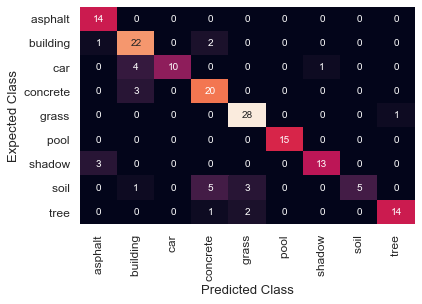

In [10]:
#c) Calculating the confusion matrix and classification report for the test data.

cmatrix = pd.crosstab(y_test, rf_predicted_test, rownames=['Expected Class'], colnames=['Predicted Class'])
sns.heatmap(cmatrix, annot=True, square=False, fmt='', cbar=False)

In [26]:
#classification report

print(metrics.classification_report(y_test, rf_predicted_test, target_names=None))

             precision    recall  f1-score   support

   asphalt        0.78      1.00      0.88        14
  building        0.73      0.88      0.80        25
       car        1.00      0.67      0.80        15
  concrete        0.71      0.87      0.78        23
     grass        0.85      0.97      0.90        29
      pool        1.00      1.00      1.00        15
    shadow        0.93      0.81      0.87        16
      soil        1.00      0.36      0.53        14
      tree        0.93      0.82      0.87        17

avg / total       0.86      0.84      0.83       168



In [1]:
#d)  Calculating predictions for the training data & building the classification report & confusion matrix.
#There are signs of overfitting as classification report and confusion matrix  for train  gives better results.

rf_predicted_train = rf_clf.predict(X_train)
print(metrics.classification_report(y_train, rf_predicted_train, target_names=None))

NameError: name 'rf_clf' is not defined

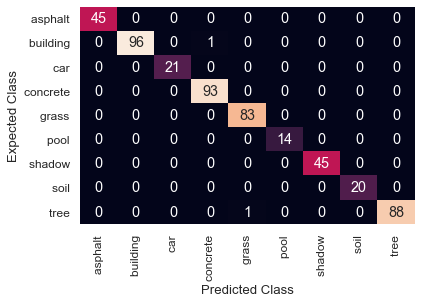

In [28]:
cmatrix = pd.crosstab(y_train, rf_predicted_train, rownames=['Expected Class'], colnames=['Predicted Class'])
sns.heatmap(cmatrix, annot=True, square=False, fmt='', cbar=False)

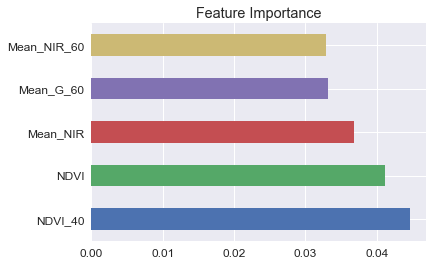

In [29]:
#e) Identifying the top 5 features. 
feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh',title="Feature Importance")

## 3. LinearSVM Classifier - Base Model:

In [30]:
#Creating a simple LinearSVC Classifier only using default parameters.

linSVC_clf = LinearSVC(random_state=0)

In [31]:
# Using the LinearSVC in sklearn. Fit your model on the training data.

linSVC_clf.fit(X_train_scaled, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [32]:
# Using the fitted model to predict on test data. Use the .predict() method to get the predicted classes.
linSVC_clf_predicted_test = linSVC_clf.predict(X_test_scaled)

             precision    recall  f1-score   support

   asphalt        0.76      0.93      0.84        14
  building        0.65      0.88      0.75        25
       car        0.85      0.73      0.79        15
  concrete        0.79      0.65      0.71        23
     grass        0.70      0.90      0.79        29
      pool        1.00      0.87      0.93        15
    shadow        0.93      0.88      0.90        16
      soil        0.86      0.43      0.57        14
      tree        0.69      0.53      0.60        17

avg / total       0.78      0.77      0.76       168



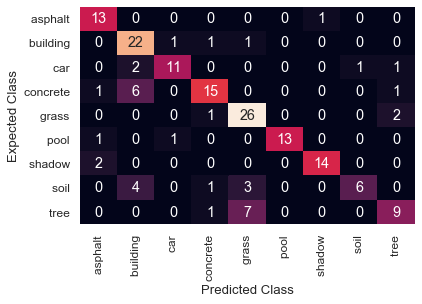

In [33]:
# Calculating the confusion matrix and classification report for test data.

cmatrix = pd.crosstab(y_test, linSVC_clf_predicted_test, rownames=['Expected Class'], colnames=['Predicted Class'])
sns.heatmap(cmatrix, annot=True, square=False, fmt='', cbar=False)
print(metrics.classification_report(y_test, linSVC_clf_predicted_test, target_names=None))

             precision    recall  f1-score   support

   asphalt        1.00      1.00      1.00        45
  building        0.99      1.00      0.99        97
       car        1.00      1.00      1.00        21
  concrete        1.00      1.00      1.00        93
     grass        1.00      0.96      0.98        83
      pool        1.00      1.00      1.00        14
    shadow        1.00      1.00      1.00        45
      soil        1.00      1.00      1.00        20
      tree        0.98      1.00      0.99        89

avg / total       0.99      0.99      0.99       507



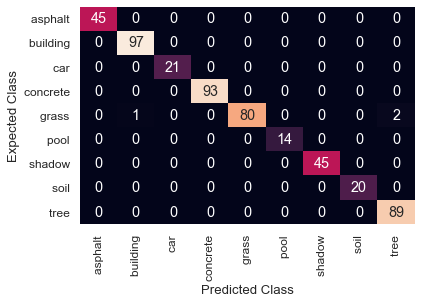

In [35]:
#d)  Calculating predictions for the training data & build the classification report & confusion matrix. 

# there are signs of overfitting as we get much better results for predictions for the training data.

linSVC_clf_predicted_train = linSVC_clf.predict(X_train_scaled)
cmatrix = pd.crosstab(y_train, linSVC_clf_predicted_train, rownames=['Expected Class'], colnames=['Predicted Class'])
sns.heatmap(cmatrix, annot=True, square=False, fmt='', cbar=False)
print(metrics.classification_report(y_train, linSVC_clf_predicted_train, target_names=None))

## 4. Support Vector Machine Classifier + Linear Kernel + Grid Search:

In [36]:
# Using SVC from sklearn with kernel = "linear". Running the GridSearchCV with required parameters.

SVClinKern_clf = SVC(kernel="linear", random_state=0)

#creating a dictionary of parameters 
param_grid = {'C':np.arange(0.01, 10.2, 0.2)}

# Creating gridsearch object with various combinations of parameters
SVClinKern_Grid = GridSearchCV(SVClinKern_clf, param_grid, cv = 5, refit = True, n_jobs=-1, verbose = 0)
SVClinKern_Grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.000e-02, 2.100e-01, 4.100e-01, 6.100e-01, 8.100e-01, 1.010e+00,
       1.210e+00, 1.410e+00, 1.610e+00, 1.810e+00, 2.010e+00, 2.210e+00,
       2.410e+00, 2.610e+00, 2.810e+00, 3.010e+00, 3.210e+00, 3.410e+00,
       3.610e+00, 3.810e+00, 4.010e+00, 4.210e+00, 4.410e+00, 4....00, 8.610e+00, 8.810e+00, 9.010e+00, 9.210e+00, 9.410e+00,
       9.610e+00, 9.810e+00, 1.001e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
#b) Identifying the best performing model:
print(SVClinKern_Grid.best_params_) 
print(SVClinKern_Grid.best_estimator_)

{'C': 0.01}
SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)


In [38]:
#c) Using the best estimator model to predict on test data. 

bestEst_xgb_grid_predicted_test = SVClinKern_Grid.best_estimator_.predict(X_test_scaled)

             precision    recall  f1-score   support

   asphalt        0.93      0.93      0.93        14
  building        0.71      0.88      0.79        25
       car        1.00      0.93      0.97        15
  concrete        0.65      0.74      0.69        23
     grass        0.83      0.86      0.85        29
      pool        1.00      0.93      0.97        15
    shadow        0.88      0.94      0.91        16
      soil        0.80      0.29      0.42        14
      tree        0.82      0.82      0.82        17

avg / total       0.83      0.82      0.81       168



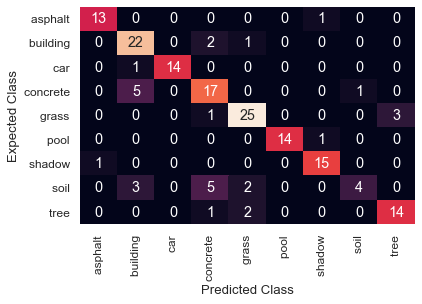

In [39]:
#d) Calculating the confusion matrix and classification report for test data.

cmatrix = pd.crosstab(y_test, bestEst_xgb_grid_predicted_test, rownames=['Expected Class'], colnames=['Predicted Class'])
sns.heatmap(cmatrix, annot=True, square=False, fmt='', cbar=False)
print(metrics.classification_report(y_test, bestEst_xgb_grid_predicted_test, target_names=None))


             precision    recall  f1-score   support

   asphalt        0.93      0.89      0.91        45
  building        0.85      0.90      0.87        97
       car        1.00      0.90      0.95        21
  concrete        0.87      0.89      0.88        93
     grass        0.91      0.84      0.88        83
      pool        1.00      0.86      0.92        14
    shadow        0.86      0.96      0.91        45
      soil        1.00      0.55      0.71        20
      tree        0.87      0.96      0.91        89

avg / total       0.89      0.89      0.89       507



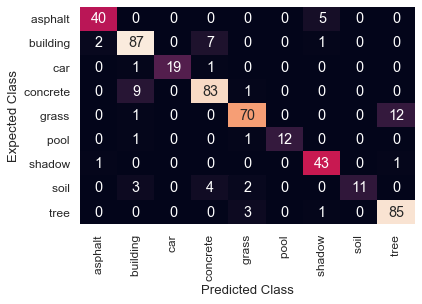

In [40]:
#e)  Calculating predictions for the training data & build the classification report & confusion matrix. 

# there aren't signs of overfitting as we get similar results for predictions for the train and test data.

bestEst_xgb_grid_predicted_train = SVClinKern_Grid.best_estimator_.predict(X_train_scaled)
cmatrix = pd.crosstab(y_train, bestEst_xgb_grid_predicted_train, rownames=['Expected Class'], colnames=['Predicted Class'])
sns.heatmap(cmatrix, annot=True, square=False, fmt='', cbar=False)
print(metrics.classification_report(y_train, bestEst_xgb_grid_predicted_train, target_names=None))

## 5. Support Vector Machine Classifier + Polynomial Kernel + Grid Search:

In [41]:
# Using SVC from sklearn with kernel = "poly". Running the GridSearchCV using the given parameters.

SVCPolyKern_clf = SVC(kernel="poly", random_state=0)

#creating a dictionary of parameters 
param_grid = {'C':np.arange(0.01, 10.2, 0.2),'degree':[2, 3, 4, 5, 6]}

# Creating gridsearch object with various combinations of parameters
SVCPolyKern_Grid = GridSearchCV(SVCPolyKern_clf, param_grid, cv = 5, refit = True, n_jobs=-1, verbose = 0)
SVCPolyKern_Grid.fit(X_train_scaled,y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.000e-02, 2.100e-01, 4.100e-01, 6.100e-01, 8.100e-01, 1.010e+00,
       1.210e+00, 1.410e+00, 1.610e+00, 1.810e+00, 2.010e+00, 2.210e+00,
       2.410e+00, 2.610e+00, 2.810e+00, 3.010e+00, 3.210e+00, 3.410e+00,
       3.610e+00, 3.810e+00, 4.010e+00, 4.210e+00, 4.410e+00, 4.....010e+00, 9.210e+00, 9.410e+00,
       9.610e+00, 9.810e+00, 1.001e+01]), 'degree': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
#b) Identifying the best performing model:
print(SVCPolyKern_Grid.best_params_) 
print(SVCPolyKern_Grid.best_estimator_)

{'C': 8.41, 'degree': 3}
SVC(C=8.41, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)


In [43]:
#c) Using the best estimator model to predict on test data. Using the .predict() method to get the predicted classes.

bestEst_SVCPolyKern_Grid_predicted_test = SVCPolyKern_Grid.best_estimator_.predict(X_test_scaled)

             precision    recall  f1-score   support

   asphalt        0.87      0.93      0.90        14
  building        0.69      0.88      0.77        25
       car        1.00      0.73      0.85        15
  concrete        0.71      0.74      0.72        23
     grass        0.72      0.90      0.80        29
      pool        0.93      0.93      0.93        15
    shadow        0.88      0.88      0.88        16
      soil        0.25      0.07      0.11        14
      tree        0.87      0.76      0.81        17

avg / total       0.76      0.78      0.76       168



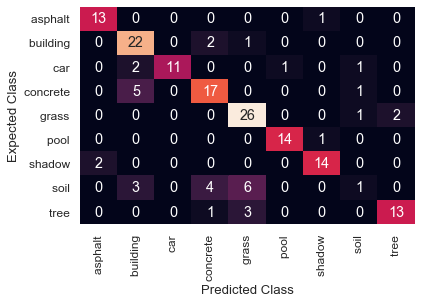

In [44]:
#d) Calculating the confusion matrix and classification report for test data.

cmatrix = pd.crosstab(y_test, bestEst_SVCPolyKern_Grid_predicted_test, rownames=['Expected Class'], colnames=['Predicted Class'])
sns.heatmap(cmatrix, annot=True, square=False, fmt='', cbar=False)
print(metrics.classification_report(y_test, bestEst_SVCPolyKern_Grid_predicted_test, target_names=None))

             precision    recall  f1-score   support

   asphalt        1.00      1.00      1.00        45
  building        0.98      1.00      0.99        97
       car        1.00      0.95      0.98        21
  concrete        1.00      0.98      0.99        93
     grass        0.90      0.99      0.94        83
      pool        1.00      0.93      0.96        14
    shadow        1.00      1.00      1.00        45
      soil        1.00      0.75      0.86        20
      tree        1.00      0.99      0.99        89

avg / total       0.98      0.98      0.98       507



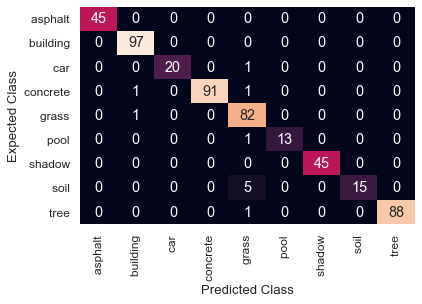

In [45]:
#e) Calculating predictions for the training data & build the classification report & confusion matrix. 


# there are signs of overfitting as we get differet results for predictions for the train and test data.Train gets better
#predictions.

bestEst_SVCPolyKern_Grid_predicted_train = SVCPolyKern_Grid.best_estimator_.predict(X_train_scaled)
cmatrix = pd.crosstab(y_train, bestEst_SVCPolyKern_Grid_predicted_train, rownames=['Expected Class'], colnames=['Predicted Class'])
sns.heatmap(cmatrix, annot=True, square=False, fmt='', cbar=False)
print(metrics.classification_report(y_train, bestEst_SVCPolyKern_Grid_predicted_train, target_names=None))

## 6. Support Vector Machine Classifier + RBF Kernel + Grid Search:

In [46]:
#a) Using SVC from sklearn with kernel = "rbf". Running the GridSearchCV using the given parameters

SVCRBFKern_clf = SVC(kernel="rbf", random_state=0)

#creating a dictionary of parameters 
param_grid = {'C':np.arange(0.01, 10.2, 0.2),'gamma':[0.01,  0.1, 1, 10, 100]}

# Creating gridsearch object with various combinations of parameters
SVCRBFKern_Grid = GridSearchCV(SVCRBFKern_clf, param_grid, cv = 5, refit = True, n_jobs=-1, verbose = 0)
SVCRBFKern_Grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.000e-02, 2.100e-01, 4.100e-01, 6.100e-01, 8.100e-01, 1.010e+00,
       1.210e+00, 1.410e+00, 1.610e+00, 1.810e+00, 2.010e+00, 2.210e+00,
       2.410e+00, 2.610e+00, 2.810e+00, 3.010e+00, 3.210e+00, 3.410e+00,
       3.610e+00, 3.810e+00, 4.010e+00, 4.210e+00, 4.410e+00, 4....0, 9.210e+00, 9.410e+00,
       9.610e+00, 9.810e+00, 1.001e+01]), 'gamma': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [47]:
#b) Identifying the best performing model

print(SVCRBFKern_Grid.best_params_) 
print(SVCRBFKern_Grid.best_estimator_)

{'C': 4.21, 'gamma': 0.01}
SVC(C=4.21, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)


In [48]:
#c) Using the best estimator model to predict on test data. Using the .predict() method to get the predicted classes

bestEst_SVCRBFKern_Grid_predicted_test = SVCRBFKern_Grid.best_estimator_.predict(X_test_scaled)

             precision    recall  f1-score   support

   asphalt        0.93      0.93      0.93        14
  building        0.72      0.84      0.78        25
       car        1.00      0.87      0.93        15
  concrete        0.68      0.83      0.75        23
     grass        0.84      0.90      0.87        29
      pool        1.00      0.93      0.97        15
    shadow        0.88      0.94      0.91        16
      soil        1.00      0.36      0.53        14
      tree        0.88      0.88      0.88        17

avg / total       0.86      0.84      0.83       168



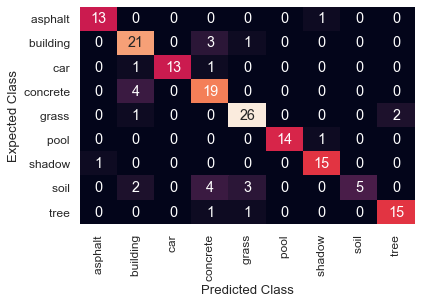

In [49]:
#d) Calculating the confusion matrix and classification report for test data

cmatrix = pd.crosstab(y_test, bestEst_SVCRBFKern_Grid_predicted_test, rownames=['Expected Class'], colnames=['Predicted Class'])
sns.heatmap(cmatrix, annot=True, square=False, fmt='', cbar=False)
print(metrics.classification_report(y_test, bestEst_SVCRBFKern_Grid_predicted_test, target_names=None))

             precision    recall  f1-score   support

   asphalt        1.00      1.00      1.00        45
  building        0.98      1.00      0.99        97
       car        1.00      1.00      1.00        21
  concrete        1.00      0.99      0.99        93
     grass        0.99      0.99      0.99        83
      pool        1.00      1.00      1.00        14
    shadow        1.00      1.00      1.00        45
      soil        1.00      1.00      1.00        20
      tree        1.00      0.99      0.99        89

avg / total       0.99      0.99      0.99       507



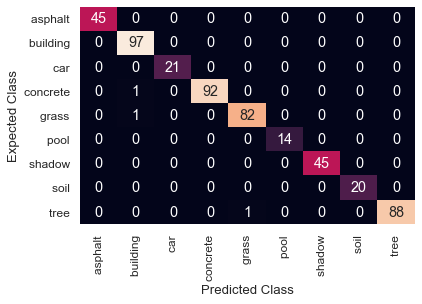

In [50]:
#e)  Calculating predictions for the training data & building the classification report & confusion matrix. 


#there are signs of overfitting as we get differet results for predictions for the train and test data.Train gets better
#predictions.

bestEst_SVCRBFKern_Grid_predicted_train = SVCRBFKern_Grid.best_estimator_.predict(X_train_scaled)
cmatrix = pd.crosstab(y_train, bestEst_SVCRBFKern_Grid_predicted_train, rownames=['Expected Class'], colnames=['Predicted Class'])
sns.heatmap(cmatrix, annot=True, square=False, fmt='', cbar=False)
print(metrics.classification_report(y_train, bestEst_SVCRBFKern_Grid_predicted_train, target_names=None))